In [0]:
# Import necessary PySpark libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import PCA
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
import seaborn as sns
import pandas as pd
from pyspark.ml.stat import ChiSquareTest
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import StringIndexer
from pyspark.ml.regression import LinearRegression
from pyspark.sql.functions import *

In [0]:
# Load data into a PySpark DataFrame
df = spark.read.format("parquet").option("header", "true").load("/temp/Cleaned")

In [0]:
# checking the schema of dataframe
df.printSchema()

root
 |-- Type of Hotel: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Month: string (nullable = true)
 |-- Reservation Date: timestamp (nullable = true)
 |-- Arrival week: integer (nullable = true)
 |-- Arrival Date: integer (nullable = true)
 |-- Weekend Stays: integer (nullable = true)
 |-- Weekday Stays: integer (nullable = true)
 |-- Meal: string (nullable = true)
 |-- Booking Payment: string (nullable = true)
 |-- Adults: integer (nullable = true)
 |-- Children: double (nullable = true)
 |-- Kids: integer (nullable = true)
 |-- Country: string (nullable = true)
 |-- Booking Type: string (nullable = true)
 |-- Repeated Guest: integer (nullable = true)
 |-- Prev Cancel: integer (nullable = true)
 |-- History: integer (nullable = true)
 |-- Reserved Room: string (nullable = true)
 |-- Assigned Room: string (nullable = true)
 |-- Booking Changes: integer (nullable = true)
 |-- Waiting List: integer (nullable = true)
 |-- Customer: string (nullable = true)
 |-- Pe

In [0]:
# Calculting the Null values in Dataframe
df.toPandas().isnull().sum().sum()

Out[5]: 0

<h4> Identifying The count of maximum hotels booked  According to type of Hotel </h4>

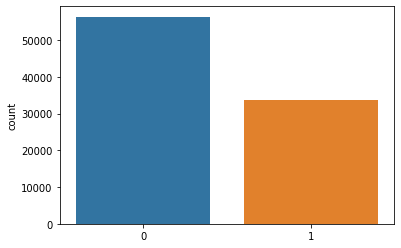

In [0]:
sns.countplot(x=df.toPandas()["Cancellation"]).set(xlabel=None);

<h4> Analysing the count of guests per month for "Villa" And "Motel" Type of Hotel</h4>

In [0]:
df.groupBy("Type of Hotel", "Month").agg(count("*").alias("Number of Guest")).sort('Number of Guest').display()

Type of Hotel,Month,Number of Guest
Villa,January,1678
Villa,November,1732
Villa,December,1917
Villa,February,2193
Villa,September,2211
Villa,June,2376
Villa,March,2542
Villa,October,2599
Villa,April,2752
Villa,May,2792


<h4> Analysing the count of guests per year for "Villa" And "Motel" Type of Hotel</h4>

In [0]:
df.groupBy("Type of Hotel", "Year").agg(count("*").alias("Number of Guest")).sort('Type of Hotel','Year').display()

Type of Hotel,Year,Number of Guest
Motel,2015,10192
Motel,2016,28646
Motel,2017,21352
Villa,2015,6110
Villa,2016,13562
Villa,2017,10136


<h4> Analysing the count of rooms booked in Categories of Assigned and Reserved room</h4>

In [0]:
df.groupBy('Assigned Room','Reserved Room').agg({"Assigned Room":'count',"Reserved Room":'count'}).show()

+-------------+-------------+--------------------+--------------------+
|Assigned Room|Reserved Room|count(Assigned Room)|count(Reserved Room)|
+-------------+-------------+--------------------+--------------------+
|            G|            E|                  55|                  55|
|            E|            E|                4541|                4541|
|            D|            A|                5645|                5645|
|            A|            G|                  11|                  11|
|            H|            F|                   5|                   5|
|            D|            C|                   4|                   4|
|            G|            F|                 104|                 104|
|            B|            G|                   2|                   2|
|            I|            F|                   3|                   3|
|            H|            H|                 384|                 384|
|            B|            F|                  24|              

<b>It can be concluded that in motel types of hotel "A" type of Reserved rooms are mostly available

<h4> Analysing the count of different types of Reserved rooms as per each hotel type</h4>

In [0]:
|#df.toPandas().groupby(["Type of Hotel"])["lead_time"].agg(["max","min","mean"])

df.toPandas().groupby(["Type of Hotel"])["Reserved Room"].agg(["value_counts"])

  File "<command-1085735261651000>", line 1
    |#df.toPandas().groupby(["Type of Hotel"])["lead_time"].agg(["max","min","mean"])
    ^
SyntaxError: invalid syntax


<h1>how many previous booking which were not canceled per year in each hotel</h1>

<h4>Here we are calculating the Correlation between features</h4>

In [0]:
# x=df.toPandas()[df["Repeated Guest"]==1]
# x["Prev Cancel"].agg(["count"])
x= df.filter(df['Repeated Guest']=='1')
x["Prev Cancel"].agg(["count"])


from pyspark.ml.feature import Combination
df.select([corr(column1, column2) for column1, column2 in combinations(["Year", "Arrival week", "Arrival Date", "Weekend Stays", "Weekday Stays", "Adults", "Children", "Kids", "Repeated Guest", "Prev Cancel", "History", "Booking Changes", "Waiting List", "Per Day Charges"], 2)]).display()

In [0]:
df.toPandas().corr()

In [0]:
# checking the Number of rows and columns in the table
df.toPandas().shape

In [0]:
# checking the statistical information about the dataset
df.describe().display()


In [0]:
# Visualization using Matplotlib and Seaborn
sns.scatterplot(x="Weekend Stays", y="Per Day Charges", hue="Cancellation", data=df.toPandas())
plt.show()

<h4> Conducting Hypothesis Testing</h4>

<h4> Hypothesis testing using t-test</h4>

In [0]:
# Taking only those records from dataset where the cancellation is True
cancellation = df.filter(col("Cancellation") == 1).select("Weekend Stays", "Weekday Stays", "Per Day Charges")
cancellation.display()


In [0]:
# Taking only those records from dataset where the cancellation is False 
non_cancellation = df.filter(col("Cancellation") == 0).select("Weekend Stays", "Weekday Stays", "Per Day Charges")
non_cancellation.display()

<h5> <i>calculating the cancellation mean, non-cancellation mean, standard deviation of cancellation and standard deviation of non cancellation for the columns "Weekend_stays, weekday stays, and Per Day charges"</h5>

In [0]:
for col_name in ["Weekend Stays", "Weekday Stays", "Per Day Charges"]:
    cancellation_mean = cancellation.agg({col_name: "mean"}).collect()[0][0]
    non_cancellation_mean = non_cancellation.agg({col_name: "mean"}).collect()[0][0]
    cancellation_stddev = cancellation.agg({col_name: "stddev"}).collect()[0][0]
    non_cancellation_stddev= non_cancellation.agg({col_name: "stddev"}).collect()[0][0]
   

In [0]:
print(f"cancellation_mean : {cancellation_mean}")
print(f"non_cancellation_mean : {non_cancellation_mean}")
print(f"cancellation_stddev : {cancellation_stddev}")
print(f"non_cancellation_stddev : {non_cancellation_stddev}")

<h6>As per the Above results 

<i>cancellation_mean : 103.3968126542384<br>
<i>non_cancellation_mean : 100.76212188414796<br>
<i>cancellation_stddev : 46.56734740421536<br>
<i>non_cancellation_stddev : 48.57861660045175<br>

<h4> Applying the T-Test </h4>

In [0]:
T_test = (cancellation_mean - non_cancellation_mean) / ((cancellation_stddev ** 2 / cancellation.count()) + (non_cancellation_stddev ** 2 / non_cancellation.count())) ** 0.5
T_test

In [0]:
# performing the T-statistic between cancellation and non-cancellation groups.
print("t-statistic for {} between cancellation and non-cancellation groups: {}".format(col_name, T_test))

<b><i>The t-test is a statistical hypothesis test used to determine if there is a significant difference between the means of two groups. 
      It calculates the t-statistic, which measures the difference between the means relative to the variation in the data.

  <b><i>In this case, our calculated t-test statistic is 8.079298389670557 it means that there is a significant difference between the means of two groups that you are comparing. 
  The significance level of the t-test is determined by the p-value. A p-value less than the significance level (usually 0.05) indicates that the difference between the     means is statistically significant, while a p-value greater than the significance level indicates that the difference is not statistically significant.

<b><i>It is important to note that the interpretation of the t-test depends on the context and the specific research question being investigated

<h4> Applying Pre-Processing</h4>

In [0]:
# Preprocessing
df = df.select(["Type of Hotel", "Meal", "Booking Payment", "Country", "Booking Type", "Repeated Guest", "Prev Cancel", "Reserved Room", "Assigned Room", "Reservation Status", "Cancellation"])

<h5> Convert categorical variables into numerical features using StringIndexer

In [0]:
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df) for column in ["Type of Hotel", "Meal", "Booking Payment", "Country", "Booking Type", "Repeated Guest", "Prev Cancel", "Reserved Room", "Assigned Room", "Reservation Status"]]
for indexer in indexers:
    df = indexer.transform(df)

In [0]:
# Perform One-hot encoding

vectorAssembler = VectorAssembler(inputCols=["Type of Hotel_index", "Meal_index", "Booking Payment_index", "Country_index", "Booking Type_index", "Repeated Guest_index", "Prev Cancel_index", "Reserved Room_index", "Assigned Room_index", "Reservation Status_index"], outputCol="features")
df = vectorAssembler.transform(df)


<h5> Split the dataset into training and testing sets

In [0]:
(trainingData, testData) = df.randomSplit([0.7, 0.3], seed=100)

<h2> CHI - SQUARE Test : <h2>

In [0]:
from pyspark.ml.feature import StringIndexer

# create a StringIndexer to convert Cancellation column to numeric index
indexer = StringIndexer(inputCol="Cancellation", outputCol="Cancellation_index")

# fit and transform the DataFrame
df = indexer.fit(df).transform(df)

In [0]:
# Conducted chi-squared test
#chiTest = ChiSquareTest.test(trainingData,"features",'')
chiTest = ChiSquareTest.test(trainingData, "features", "Cancellation")
print("pValues: " + str(chiTest.select("pValues").collect()[0]))

<b> <i> The result of the chi-squared test is a vector of p-values for each feature in the dataset. <br>
        In this case, the result is a DenseVector with 10 p-values. Each p-value represents the statistical significance of the association between a feature and the             target variable (in this case, cancellation).<br>

<b> <i> A p-value is the probability of observing a test statistic as extreme as the one computed from the data, assuming the null hypothesis is true. 
  In this case, the null hypothesis is that there is no association between the feature and the target variable. <br>
        
<b> <i> A low p-value (typically less than 0.05) indicates that there is strong evidence to reject the null hypothesis and conclude that there is a significant                   association between the feature and the target variable.<br>

<b> <i>Therefore, in your result, all the p-values are 0.0, which means there is strong evidence to reject the null hypothesis for all the features and conclude that they        are significantly associated with the cancellation variable.<br>

  <h4>This implies that the alternate hypothesis testing is positive<h4>

In [0]:
sns.countplot(x=df.toPandas()["Cancellation"]).set(xlabel=None);

In [0]:
# g_h=df.groupby(["hotel"])["is_canceled"].agg(["value_counts"])  # 1 indicated cancellation and 0 indicates not cancelled
# g_h

df.groupBy(["Type of Hotel","Cancellation"]).agg({"Type of Hotel":'count',"Cancellation":'count'}).show()

In [0]:
df.select('Type of Hotel','Repeated Guest','Parking at premises').display()